Carga de paquetes (y en el colab meter la imagen, habrá que quitar lo del google colab)

In [3]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install easyocr

import pywt
import pywt.data
from PIL import Image
import numpy as np
import cv2 # Para leer imagenes y meterles bordes, contornos y cosas
from google.colab.patches import cv2_imshow
import easyocr #OCR que igual ni usamos
import pytesseract  # El ocr bueno
import matplotlib.pyplot as plt
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

from google.colab import files

uploaded = files.upload()

reader = easyocr.Reader(['hi','en'])


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.
^C


ocr pytesseract para sacar imagenes letra a letra usando el find_contours:

In [ ]:
image_path_in_colab="/content/WhatsApp Image 2023-11-17 at 12.19.16.jpeg"

image = cv2.imread(image_path_in_colab)

# Convertir a escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar umbralización o técnicas de binarización si es necesario

# Aplicar un filtro de suavizado o técnicas de eliminación de ruido si es necesario

# Detección de bordes con el algoritmo Canny
edged_image = cv2.Canny(gray, threshold1=30, threshold2=100)  # Ajusta los valores de umbral según tu imagen

# Encuentra los contornos en la imagen de bordes
contours, _ = cv2.findContours(edged_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_KCOS)

valid_contours = []

# Recorrer los contornos identificados
for i,contour in enumerate(contours):
    # Obtener las coordenadas y dimensiones de cada contorno
    x, y, w, h = cv2.boundingRect(contour)

    # Recortar la región con la letra
    letter_region = image[y:y+h, x:x+w]

    # Guardar la imagen de la letra y el texto reconocido
    if cv2.contourArea(contour) > 20:  # Ajusta este umbral según tu criterio
        valid_contours.append(contour)

sorted_contours = sorted(valid_contours, key=lambda c: cv2.boundingRect(c)[0])

cv2.drawContours(image, sorted_contours, -1, (0, 255, 0), 2)

import shutil

# Ruta de la carpeta que deseas eliminar
folder_path = '/fotos'

# Verificar si la carpeta existe antes de eliminarla
if os.path.exists(folder_path):
    # Eliminar la carpeta y su contenido
    shutil.rmtree(folder_path)
    print(f"La carpeta {folder_path} ha sido eliminada.")
else:
    print(f"La carpeta {folder_path} no existe.")

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Recorrer los contornos válidos identificados
for i, contour in enumerate(sorted_contours):
    # Obtener las coordenadas y dimensiones de cada contorno
    x, y, w, h = cv2.boundingRect(contour)

    # Recortar la región con la letra
    letter_region = image[y:y+h, x:x+w]

    # Guardar la imagen de la letra
    cv2.imwrite(f'/fotos/contorno_{i}.png', letter_region)

# Mostrar la imagen con los contornos válidos
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Dibuja las imagenes detectadas:

In [ ]:
# Dibujar rectángulos alrededor de los contornos detectados en la imagen original
for contour in sorted_contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)  # Dibujar rectángulo verde

# Mostrar la imagen con los rectángulos dibujados
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Cambiar el find contours por el connectedcomponents (va algo mejor):

La carpeta /fotos ha sido eliminada.


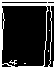

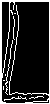

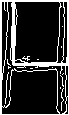

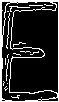

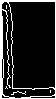

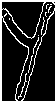

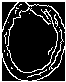

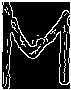

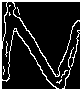

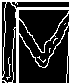

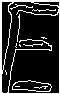

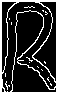

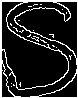

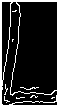

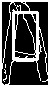

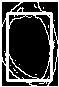

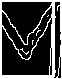

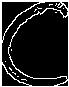

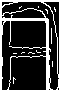

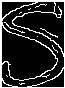

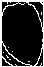

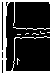

In [87]:
import cv2
import numpy as np

folder_path = '/fotos'
folder_name = "fotos"
if os.path.exists(folder_path):
    # Eliminar la carpeta y su contenido
    shutil.rmtree(folder_path)
    print(f"La carpeta {folder_path} ha sido eliminada.")
else:
    print(f"La carpeta {folder_path} no existe.")

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

image_path_in_colab="/content/WhatsApp Image 2023-11-17 at 12.19.16.jpeg"

image = cv2.imread(image_path_in_colab)

# Convertir a escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar umbralización o técnicas de binarización si es necesario

# Aplicar un filtro de suavizado o técnicas de eliminación de ruido si es necesario

# Detección de bordes con el algoritmo Canny
edged_image = cv2.Canny(gray, threshold1=30, threshold2=100)  # Ajusta los valores de umbral según tu imagen

# Aplicar Connected Component Analysis

regiones_recortadas = []
_, labels, stats, centroids = cv2.connectedComponentsWithStats(edged_image)

# Iterar a través de los componentes conectados y filtrar por ciertas estadísticas
for i, stat in enumerate(stats):
    # Filtrar componentes conectados basados en ciertas estadísticas (área, posición, etc.)
    # Por ejemplo, puedes filtrar por el área para eliminar componentes pequeños o grandes
    area = stat[cv2.CC_STAT_AREA]
    if area > 100 and area < 700:  # Cambia estos valores según tus necesidades
        # Dibujar un rectángulo alrededor del componente conectado
        x, y, w, h = stat[cv2.CC_STAT_LEFT], stat[cv2.CC_STAT_TOP], stat[cv2.CC_STAT_WIDTH], stat[cv2.CC_STAT_HEIGHT]
        cv2.rectangle(edged_image, (x, y), (x + w, y + h), (255, 0, 0), 2)
        # Recortar la región del rectángulo de la imagen original
        roi = edged_image[y:y+h, x:x+w]
        regiones_recortadas.append(roi)
        # Guardar la región del rectángulo como una imagen en la carpeta "fotos"
        cv2.imwrite(os.path.join(folder_path, f'rectangle_{i}.png'), roi)

for region in regiones_recortadas:
    cv2_imshow(region)


# Mostrar la imagen con los rectángulos dibujados alrededor de las letras detectadas
#cv2_imshow(edged_image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

ocr easyocr para sacar imagenes letra a letra (no sirve):

In [ ]:
# Convertir a escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar umbralización o técnicas de binarización si es necesario

# Aplicar un filtro de suavizado o técnicas de eliminación de ruido si es necesario

# Configurar EasyOCR
reader = easyocr.Reader(['en'])  # Puedes añadir más idiomas si es necesario

# Encontrar contornos en la imagen de bordes
contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Recorrer los contornos identificados
for contour in contours:
    # Obtener las coordenadas y dimensiones de cada contorno
    x, y, w, h = cv2.boundingRect(contour)

    # Recortar la región con la letra
    letter_region = image[y:y+h, x:x+w]

    # Convertir la región a RGB (EasyOCR espera imágenes en formato RGB)
    letter_rgb = cv2.cvtColor(letter_region, cv2.COLOR_BGR2RGB)

    # Aplicar EasyOCR para reconocimiento de texto en la región
    result = reader.readtext(letter_rgb)

    if result:
        text = result[0][-2]  # Tomar el texto reconocido

        # Guardar la imagen de la letra y el texto reconocido
        cv2.imwrite('letra_{}.png'.format(text), letter_region)

Progress: |██████████████████████████████████████████████████| 100.0% Complete